<h1><center>MODELO PREDICTIVO PARA LA DETECCIÓN DE FRAUDES EN TARJETAS DE CRÉDITO APLICANDO APRENDIZAJE AUTOMÁTICO</center></h1>

## Autores : Daniel Enrique Barros Agamez & Kevin Acosta Lopez


## 1. Cargando Datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from scipy.stats import ttest_ind

# Sentencia para mostrar la traza de la gráfica
%matplotlib inline

# Estilo de los gráficos
plt.style.use('ggplot')

In [2]:
COLUMNAS = np.array(['Id','Fecha de Transaccion','No tarjeta cliente','Nombre comerciante','Categoria comerciante','Monto transaccion', 'Nombre',
           'Apellido','Genero','Direccion tarjeta','Ciudad','Estado','Zip tarjeta','Latitud','Longitud','Ciudad popular',
           'Trabajo','Fecha de nacimiento','Fecha unica','Hora transaccion','Latitud comerciante','Longitud comerciante', 'Fraude'])
data = pd.read_csv("fraude.csv", delimiter = ',' , names = COLUMNAS , header = 0)
del(COLUMNAS)
data.head(5)

,Id,Fecha de Transaccion,No tarjeta cliente,Nombre comerciante,Categoria comerciante,Monto transaccion,Nombre,Apellido,Genero,Direccion tarjeta,...,Latitud,Longitud,Ciudad popular,Trabajo,Fecha de nacimiento,Fecha unica,Hora transaccion,Latitud comerciante,Longitud comerciante,Fraude
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


## 2. Exploración de los datos

### *2.1 y 2.2 Número de instancias y atributos:*

In [4]:
shape = data.shape
print(f"Número de instancias: {shape[0]}")
print(f"Número de atributos: {shape[1]}")

Número de instancias: 563225
Número de atributos: 23


### *2.3 El conjunto de datos está etiquetado con la variable de clase "is_fraud"*

### *2.4 Cantidad de atributos numéricos y categóricos*

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563225 entries, 0 to 563224
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Id                     563225 non-null  int64  
 1   Fecha de Transaccion   563225 non-null  object 
 2   No tarjeta cliente     563225 non-null  int64  
 3   Nombre comerciante     563225 non-null  object 
 4   Categoria comerciante  563225 non-null  object 
 5   Monto transaccion      563225 non-null  float64
 6   Nombre                 563225 non-null  object 
 7   Apellido               563225 non-null  object 
 8   Genero                 563225 non-null  object 
 9   Direccion tarjeta      563225 non-null  object 
 10  Ciudad                 563225 non-null  object 
 11  Estado                 563225 non-null  object 
 12  Zip tarjeta            563225 non-null  int64  
 13  Latitud                563225 non-null  float64
 14  Longitud               563225 non-nu

In [6]:
data['Fraude'] = data['Fraude'].astype('object')
categorico = data.select_dtypes(include = 'object').columns
numerico = data.select_dtypes(include = 'int64').columns
flotante = data.select_dtypes(include = 'float64').columns

print("------CANTIDAD DE ATRIBUTOS SEGÚN SU TIPO-------")
print("Variables categoricas: ", len(categorico))
print("Variables númericas: ", len(numerico))
print("Variables numericas flotantes: ", len(flotante))

------CANTIDAD DE ATRIBUTOS SEGÚN SU TIPO-------
Variables categoricas:  13
Variables númericas:  5
Variables numericas flotantes:  5


### *2.5 Moda, cantidad de valores únicos y frecuencia de atributos categoricos*

In [7]:
data[['Fecha de Transaccion', 'Categoria comerciante', 'Nombre comerciante', 'Genero', 'Direccion tarjeta',
     'Ciudad', 'Estado', 'Trabajo', 'Fecha de nacimiento']].describe()

,Fecha de Transaccion,Categoria comerciante,Nombre comerciante,Genero,Direccion tarjeta,Ciudad,Estado,Trabajo,Fecha de nacimiento
count,563225,563225,563225,563225,563225,563225,563225,563225,563225
unique,552261,14,693,2,999,906,51,497,984
top,2020-12-19 16:02:22,gas_transport,fraud_Kilback LLC,F,6983 Carrillo Isle,Birmingham,TX,Film/video editor,1977-03-23
freq,4,56988,1906,308621,1476,2434,40872,4163,2424


### *2.6 Media, rango y desviación estandar de cada atributo numérico*

In [9]:
data.describe()

,Id,No tarjeta cliente,Monto transaccion,Zip tarjeta,Latitud,Longitud,Ciudad popular,Hora transaccion,Latitud comerciante,Longitud comerciante
count,5.632250e+05,5.632250e+05,563225.000000,563225.000000,563225.000000,563225.000000,5.632250e+05,5.632250e+05,563225.000000,563225.000000
mean,2.824846e+05,4.176057e+17,75.548833,48831.914398,38.544857,-90.227123,8.834256e+04,1.380249e+09,38.544278,-90.227175
std,1.706452e+05,1.309403e+18,170.529091,26860.925816,5.062845,13.729378,3.007564e+05,6.553585e+06,5.097493,13.740796
min,0.000000e+00,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325466e+09,19.027422,-166.671575
25%,1.394970e+05,1.800429e+14,9.730000,26237.000000,34.690200,-96.798000,7.410000e+02,1.375827e+09,34.760443,-96.901767
50%,2.795150e+05,3.521417e+15,47.840000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380581e+09,39.377368,-87.440158
75%,4.196860e+05,4.635331e+15,84.440000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385842e+09,41.954514,-80.260118
max,1.295733e+06,4.992346e+18,22768.110000,99921.000000,66.693300,-67.950300,2.906700e+06,1.388534e+09,67.510267,-66.952026


In [10]:
#rango
data.select_dtypes(exclude='object').apply(lambda x: max(x)-min(x))

Id                      1.295733e+06
No tarjeta cliente      4.992346e+18
Monto transaccion       2.276711e+04
Zip tarjeta             9.866400e+04
Latitud                 4.666620e+01
Longitud                9.772200e+01
Ciudad popular          2.906677e+06
Hora transaccion        6.306798e+07
Latitud comerciante     4.848284e+01
Longitud comerciante    9.971955e+01
dtype: float64

### *2.7 Distribción de las clases*

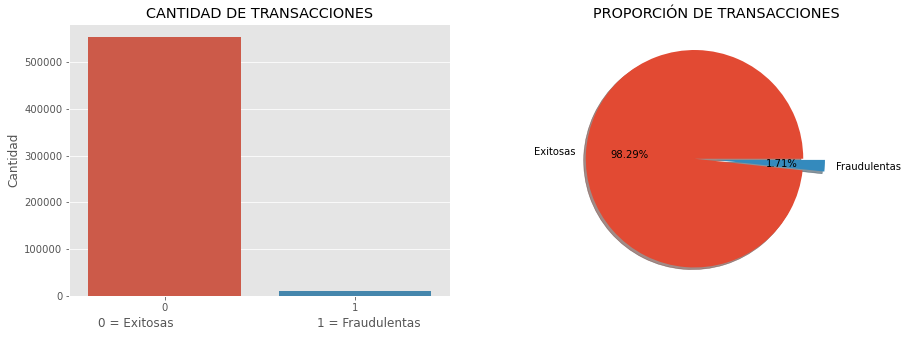

In [89]:
datos = data['Fraude'].value_counts()
labels = np.array(['Exitosas', 'Fraudulentas'])
#figura y gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
circular = ax2.pie(datos.values, labels=labels, autopct='%1.2f%%', shadow=True, explode = [0.2, 0])
#barras = ax1.bar(labels, datos.values)
barras = sb.countplot(x = 'Fraude', data = data, ax = ax1)
#Titulos
ax2.set(title="PROPORCIÓN DE TRANSACCIONES")
ax1.set(title="CANTIDAD DE TRANSACCIONES")
ax1.set(ylabel = 'Cantidad')
ax1.set(xlabel = f'0 = Exitosas {" "*35} 1 = Fraudulentas')
plt.show()

In [13]:
print("Cantidad de fruades : ", datos[1])
print("Cantidad casos exitosos : ", datos[0])
print("Difenrencia entre las clases: ", datos[0]-datos[1])

Cantidad de fruades :  9651
Cantidad casos exitosos :  553574
Difenrencia entre las clases:  543923


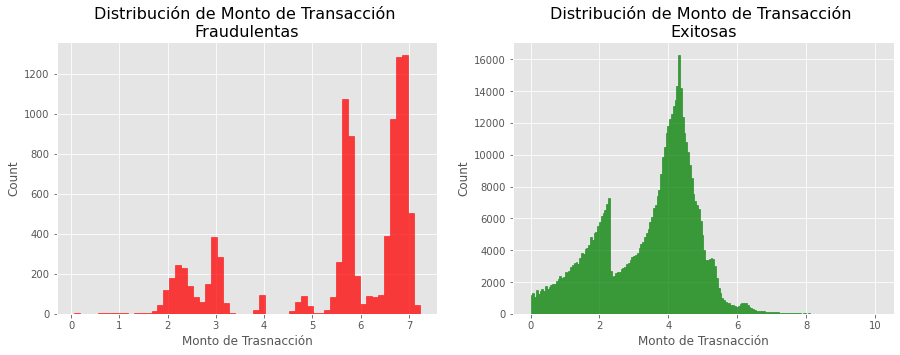

In [14]:
monto_Fra = data['Monto transaccion'].loc[data['Fraude'] == 1].values #Fraudulentas
monto_Exi = data['Monto transaccion'].loc[data['Fraude'] == 0].values #Exitosas
#Figuras
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1 = sb.histplot(np.log(monto_Fra), ax = ax1, element = "step", color = 'red')
ax2 = sb.histplot(np.log(monto_Exi), ax = ax2, element="step", color = 'green')
#Etiquetas
ax1.set_xlabel('Monto de Trasnacción')
ax1.set_title('Distribución de Monto de Transacción \nFraudulentas', fontsize=16)
ax2.set_xlabel('Monto de Trasnacción')
ax2.set_title('Distribución de Monto de Transacción \nExitosas', fontsize=16)
plt.show()

Media Monto de Transacción :  75.54883345022084


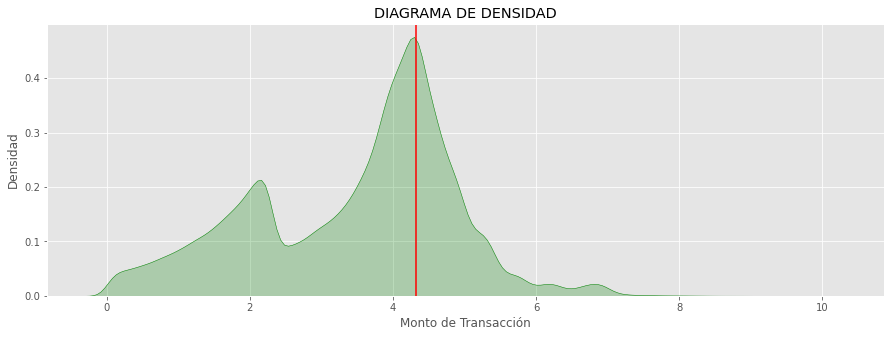

In [15]:
plt.figure(figsize=(15, 5))
media1 = data['Monto transaccion'].mean()
sb.kdeplot(x = np.log(data['Monto transaccion'].values), shade = True, color = 'green')
plt.ylabel("Densidad")
plt.xlabel("Monto de Transacción")
plt.title("DIAGRAMA DE DENSIDAD")
plt.axvline(np.log(media1), 0,1, color = 'red')
print(f"Media Monto de Transacción :  {media1}")


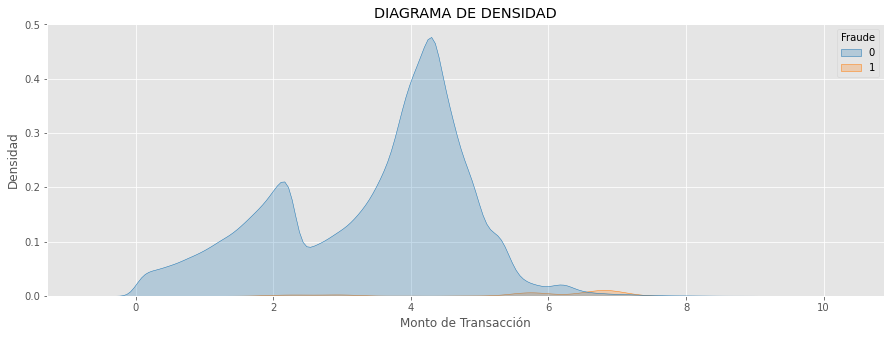

In [16]:
#Cambiar colores
plt.figure(figsize=(15, 5))
sb.kdeplot(x = np.log(data['Monto transaccion'].values), shade = True, hue = data['Fraude'], palette = "tab10")
plt.ylabel("Densidad")
plt.xlabel("Monto de Transacción")
plt.title("DIAGRAMA DE DENSIDAD")
plt.show()

### *2.8 Detección de datos atípicos*

In [17]:
#Detectando datos nulos
data.isna().sum()

Id                       0
Fecha de Transaccion     0
No tarjeta cliente       0
Nombre comerciante       0
Categoria comerciante    0
Monto transaccion        0
Nombre                   0
Apellido                 0
Genero                   0
Direccion tarjeta        0
Ciudad                   0
Estado                   0
Zip tarjeta              0
Latitud                  0
Longitud                 0
Ciudad popular           0
Trabajo                  0
Fecha de nacimiento      0
Fecha unica              0
Hora transaccion         0
Latitud comerciante      0
Longitud comerciante     0
Fraude                   0
dtype: int64

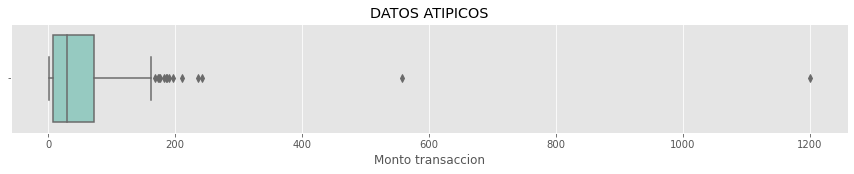

count    563225.000000
mean         75.548833
std         170.529091
min           1.000000
25%           9.730000
50%          47.840000
75%          84.440000
max       22768.110000
Name: Monto transaccion, dtype: float64
IQR:  74.71
Mediana:  47.84


In [18]:
plt.figure(figsize=(15, 2))
plt.title("DATOS ATIPICOS")
ax = sb.boxplot(x = data['Monto transaccion'].head(300), orient="h", palette="Set3")
plt.show()
print(data['Monto transaccion'].describe())
print("IQR: ", data['Monto transaccion'].quantile(0.75)-data['Monto transaccion'].quantile(0.25))
print("Mediana: ", data['Monto transaccion'].median())

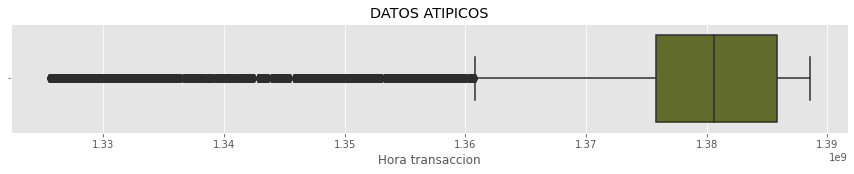

count    5.632250e+05
mean     1.380249e+09
std      6.553585e+06
min      1.325466e+09
25%      1.375827e+09
50%      1.380581e+09
75%      1.385842e+09
max      1.388534e+09
Name: Hora transaccion, dtype: float64
IQR:  10015074.0
Mediana:  1380581462.0


In [19]:
plt.figure(figsize=(15, 2))
plt.title("DATOS ATIPICOS")
ax = sb.boxplot(x = data['Hora transaccion'], orient="h", color = '#687522')
plt.show()
print(data['Hora transaccion'].describe())
print("IQR: ", data['Hora transaccion'].quantile(0.75)-data['Hora transaccion'].quantile(0.25))
print("Mediana: ", data['Hora transaccion'].median())

## 3. Relacionando Atributos

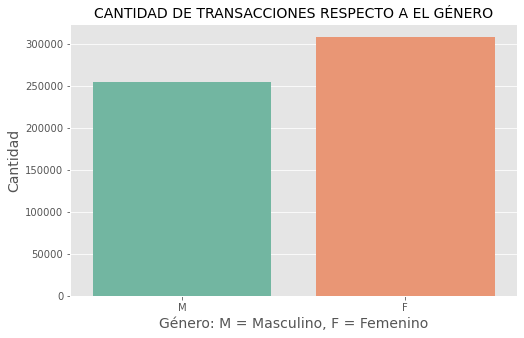

In [20]:
#Relación cantidad de transacciones y género
plt.figure(figsize=(8,5))
ax = sb.countplot(x = data['Genero'], data = data, palette="Set2")
ax.set_xlabel("Género: M = Masculino, F = Femenino", fontsize=14)
ax.set_ylabel("Cantidad", fontsize=14)
ax.set_title("CANTIDAD DE TRANSACCIONES RESPECTO A EL GÉNERO", fontsize = 14)
plt.show()

In [26]:
data.groupby('Genero')['Genero'].count().sort_values(ascending = False)

Genero
F    304886
M    250833
Name: Genero, dtype: int64

In [21]:
#Relación cantidad de transacciones exitosas y fraudulentas con respecto al género
genero_Fra = data[data.Fraude == 1] # fraudulentas
genero_Exi = data[data.Fraude == 0] # exitosas

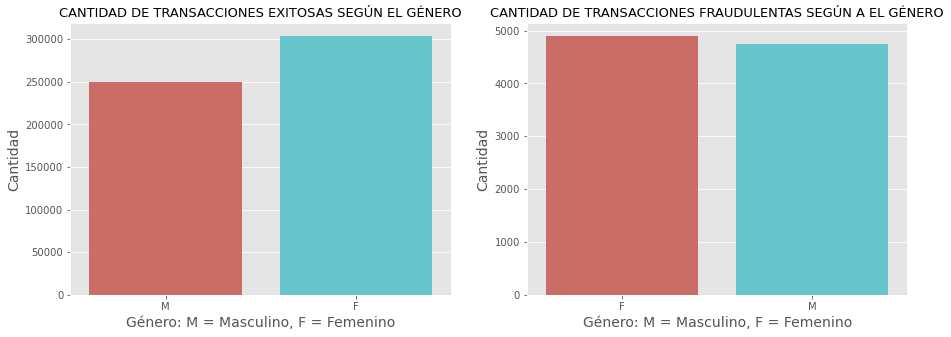

In [22]:
#Figura
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
#Gráfica
ax1 = sb.countplot(x = 'Genero', data = genero_Exi, ax = ax1, palette = 'hls')
ax2 = sb.countplot(x = 'Genero', data = genero_Fra, ax = ax2, palette = 'hls')
#Etiquetas
ax1.set_xlabel("Género: M = Masculino, F = Femenino", fontsize=14)
ax1.set_ylabel("Cantidad", fontsize=14)
ax1.set_title("CANTIDAD DE TRANSACCIONES EXITOSAS SEGÚN EL GÉNERO", fontsize=13)
ax2.set_xlabel("Género: M = Masculino, F = Femenino", fontsize=14)
ax2.set_ylabel("Cantidad", fontsize=14)
ax2.set_title("CANTIDAD DE TRANSACCIONES FRAUDULENTAS SEGÚN A EL GÉNERO", fontsize=13)
plt.show()

In [23]:
#data['Fecha de Transaccion'] = pd.to_datetime(data['Fecha de Transaccion'])
#ax = sb.lineplot(x='Fecha de Transaccion', data = data)
estados = data.groupby('Estado')['Estado'].count().sort_values(ascending = False).head(10)

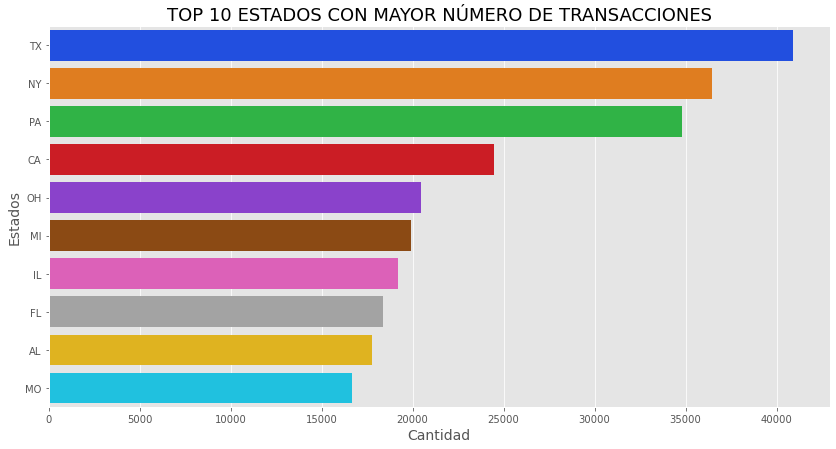

Estado
TX    40872
NY    36473
PA    34784
CA    24461
OH    20468
MI    19909
IL    19208
FL    18385
AL    17747
MO    16692
Name: Estado, dtype: int64


In [30]:
#Relación cantidad de transacciones y Estado
plt.figure(figsize=(14,7))
ax = sb.barplot(x = estados.values, y = estados.index, palette="bright")
ax.set_ylabel("Estados", fontsize=14)
ax.set_xlabel("Cantidad", fontsize=14)
ax.set_title("TOP 10 ESTADOS CON MAYOR NÚMERO DE TRANSACCIONES", fontsize=18)
plt.show()
print(estados)

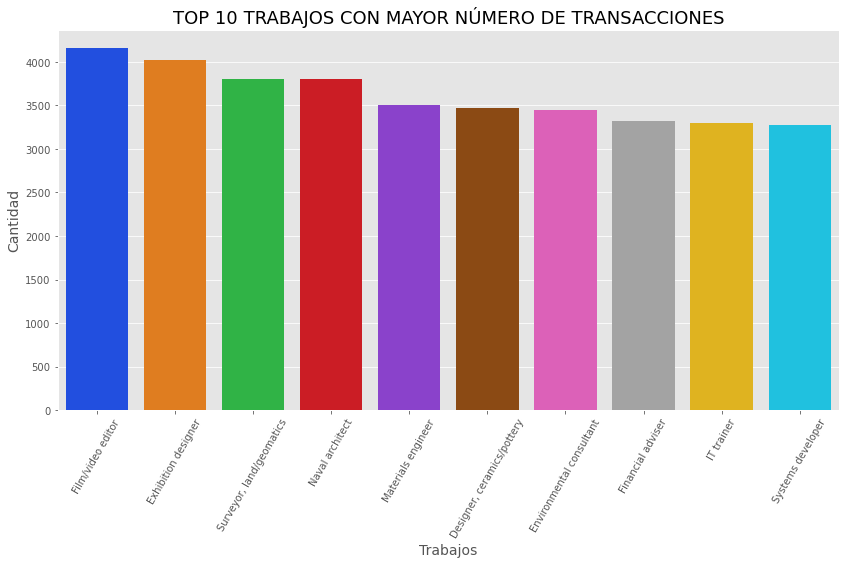

Trabajo
Film/video editor             4163
Exhibition designer           4019
Surveyor, land/geomatics      3806
Naval architect               3803
Materials engineer            3503
Designer, ceramics/pottery    3475
Environmental consultant      3449
Financial adviser             3327
IT trainer                    3293
Systems developer             3275
Name: Trabajo, dtype: int64


In [31]:
#Relación cantidad de transacciones y trabajos
trabajos = data.groupby('Trabajo')['Trabajo'].count().sort_values(ascending = False).head(10)
plt.figure(figsize=(14,7))
ax = sb.barplot(y = trabajos.values, x = trabajos.index, palette="bright")
ax.set_ylabel("Cantidad", fontsize=14)
ax.set_xlabel("Trabajos", fontsize=14)
ax.set_xticklabels(trabajos.index, rotation = 60) 
ax.set_title("TOP 10 TRABAJOS CON MAYOR NÚMERO DE TRANSACCIONES", fontsize=18)
plt.show()
print(trabajos)

### 3. MATRIZ DE CORRELACIÓN

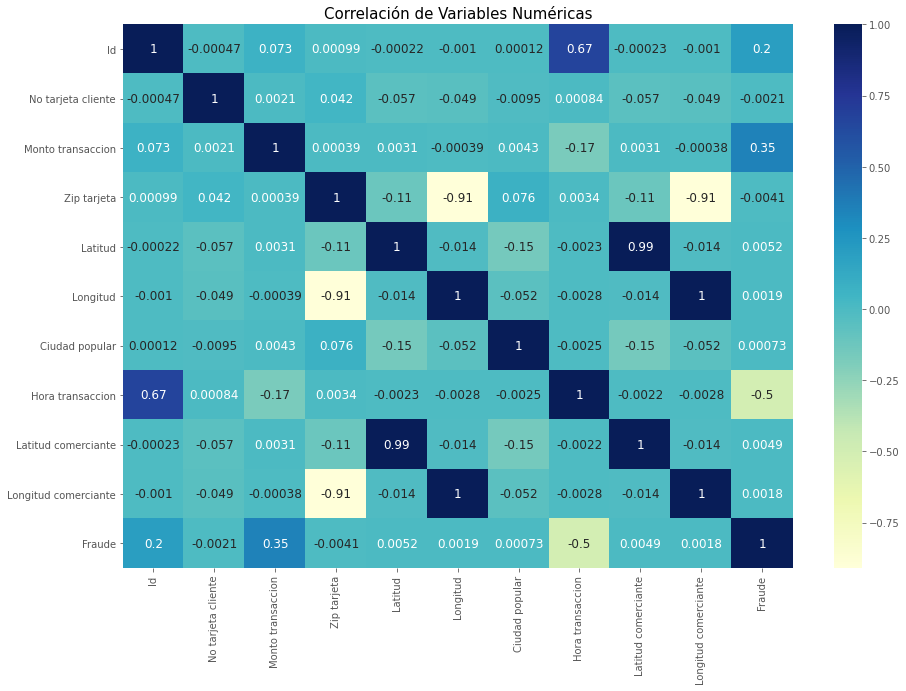

In [29]:
data['Fraude'] = data['Fraude'].astype('int64')
plt.figure(figsize=(15,10))
pc = data.corr(method ='pearson')
ax = sb.heatmap(pc, annot=True, annot_kws={'size': 12}, cmap="YlGnBu")
ax.set_title('Correlación de Variables Numéricas', fontsize = 15)
plt.show()
del(pc)

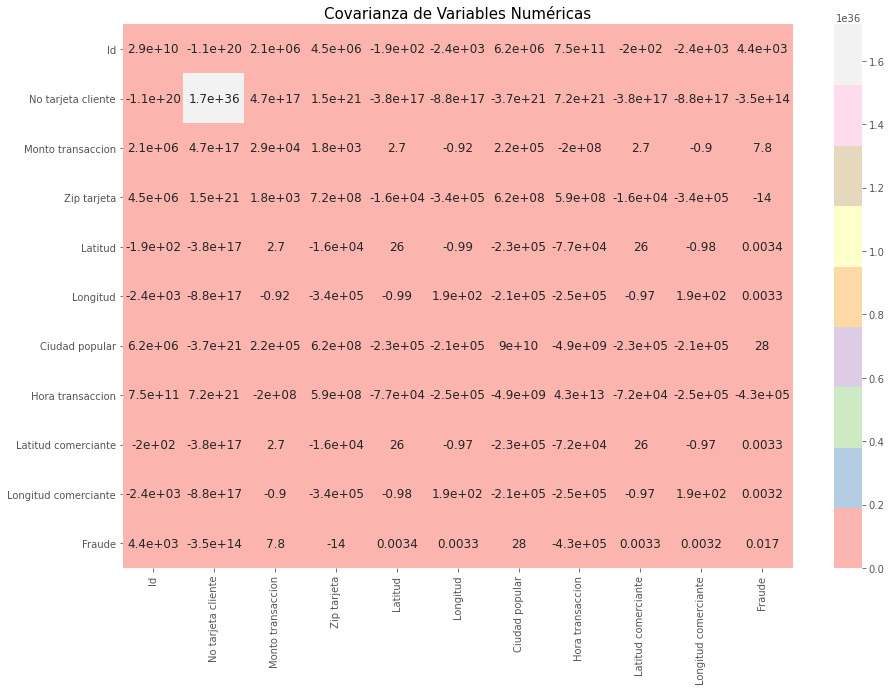

In [27]:
#Matriz de Covarianza
plt.figure(figsize=(15,10))
ax = sb.heatmap(data.cov(), annot=True, annot_kws={'size': 12}, cmap="Pastel1")
ax.set_title('Covarianza de Variables Numéricas', fontsize = 15)
plt.show()

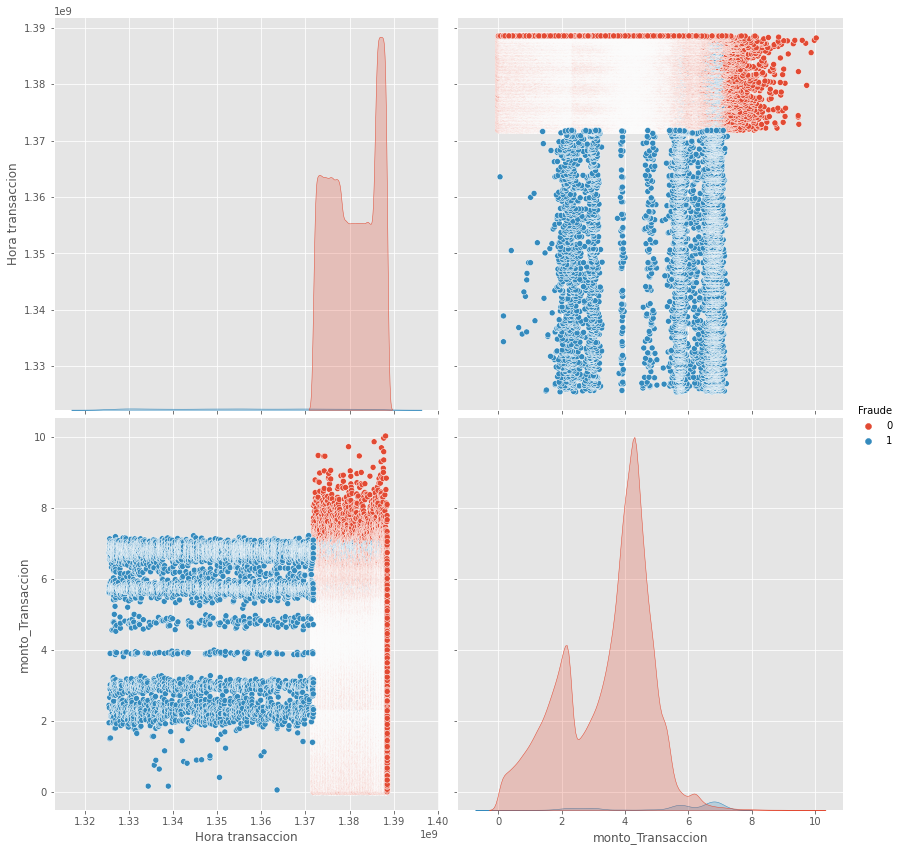

In [45]:
matriz = data[['Hora transaccion', 'Fraude']]
matriz = matriz.assign(monto_Transaccion = np.log(data['Monto transaccion']))
ax = sb.pairplot(matriz, hue = 'Fraude', height = 6, diag_kind="hist")
plt.show()
del(matriz)

## 4. Hipótesis


In [ ]:
def prueba(p):
    if (p < 0.05):
        return ("Si existen diferencias significativas")
    return("No se econtrarón diferencias significativas")

### Primera Hipótesis
- Hipotesis Alternativa: si existen diferencias significativas en el monto de la transaccion de los hombres y de las mujeres
- Hipotesis Nula : No, son iguales
- Alpha: 5% = 0.5


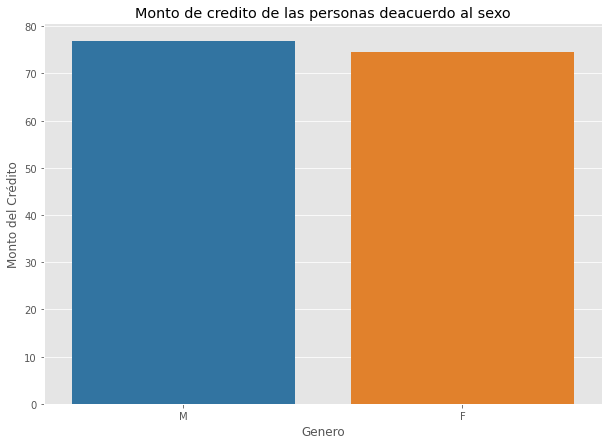

In [88]:
plt.figure(figsize=(10,7))
sb.barplot(x = 'Genero', y = 'Monto transaccion', data = data, ci = None, palette="tab10")
plt.title("Monto de credito de las personas deacuerdo al sexo")
plt.ylabel("Monto del Crédito")
plt.xlabel("Genero")
plt.show()

In [50]:
hombre = data.loc[data['Genero'] == 'M']
mujer =  data.loc[data['Genero'] == 'F']
hombreMonto = hombre['Monto transaccion']
mujerMonto = mujer['Monto transaccion']
stat, p = ttest_ind(hombreMonto, mujerMonto, equal_var = False)
print('t=%.3f, p=%.6f' % (stat, p))

t=4.917, p=0.000001


In [53]:
prueba(p)

'Si existen diferencias significativas'

### Dado el resultado podemos decir que la hipótesis alternativa es rechazada  y es aceptada la hipotesis nula, osea que no hay diferencias

### Segunda Hipótesis
- Hipotesis Alternativa: si existen diferencias significativas en el monto de transacciones segun la clase 
- Hipotesis Nula : No, son iguales
- Alpha: 5% = 0.5

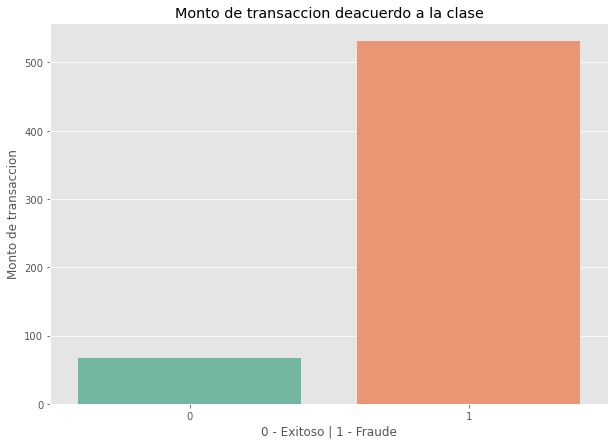

In [87]:
plt.figure(figsize=(10,7))
sb.barplot(x = 'Fraude', y = 'Monto transaccion', data = data, ci = None, palette="Set2")
plt.title("Monto de transaccion deacuerdo a la clase")
plt.ylabel("Monto de transaccion")
plt.xlabel("0 - Exitoso | 1 - Fraude")
plt.show()

In [32]:
NoFraude = data.loc[data['Fraude'] == 0]
SiFraude =  data.loc[data['Fraude'] == 1]
NoFraudeMonto = NoFraude['Monto transaccion']
SiFraudeMonto = SiFraude['Monto transaccion']

In [33]:
stat, p = ttest_ind(SiFraudeMonto, NoFraudeMonto , equal_var = False)
print('t=%.3f, p=%.6f' % (stat, p))

t=54.316, p=0.000000


In [34]:
prueba(p)

'Si existen diferencias significativas'

### Dado el resultado podemos decir que la hipótesis alternativa es aceptada por lo tanto si existen diferencias significativas

In [49]:
stat, p = ttest_ind(new_Data['Genero'], new_Data['Monto transaccion'] , equal_var = False)
print('t=%.3f, p=%.6f' % (stat, p))

t=-111.535, p=0.000000


## 5. Procesamiento de los Datos

### Se realizarán tareas como:
- Selección de los datos
- Limpieza de los datos
- Construcción de los datos
- Integración de los datos

### *5.1 Selección de los datos*

In [47]:
#Eliminación de atributos que no son relevantes
data2 = data.drop(columns=['Id', 'Fecha unica', 'Nombre', 'Apellido', 'Nombre comerciante', 'Direccion tarjeta',
                           'Latitud comerciante', 'Longitud comerciante', 'Estado', 'Trabajo', 'Zip tarjeta',
                           'Ciudad', 'Ciudad popular', 'Latitud', 'Longitud'])

In [48]:
data2.head(3)

,Fecha de Transaccion,No tarjeta cliente,Categoria comerciante,Monto transaccion,Genero,Fecha de nacimiento,Hora transaccion,Fraude
0,2020-06-21 12:14:25,2291163933867244,personal_care,2.86,M,1968-03-19,1371816865,0
1,2020-06-21 12:14:33,3573030041201292,personal_care,29.84,F,1990-01-17,1371816873,0
2,2020-06-21 12:14:53,3598215285024754,health_fitness,41.28,F,1970-10-21,1371816893,0


In [72]:
#Verificando registros duplicados para eliminarlos ---> False indica que no existen duplicados
data2.duplicated().value_counts()

False    563225
dtype: int64

### *5.2 Balance de la población a través de una submuestra aleatoria*

In [74]:
#Cantidad de datos clasificados por fraudes
cantidad = data2['Fraude'].value_counts()
print('Cantidad total de datos: ', cantidad.sum())
print('Cantidad Fraudulentas: ', cantidad[1])
print('Cantidad Exitosas: ', cantidad[0])

Cantidad total de datos:  563225
Cantidad Fraudulentas:  9651
Cantidad Exitosas:  553574


In [109]:
#Calculando el tamño de la submuetra aleatoria
porcentaje = .06
cantidad[0]*porcentaje + cantidad[1]

42865.44

In [110]:
#Obtener muestra aleatoria de los datos
data3 = data2.sample(frac = 1)

#Separamos las cantidades por la Clase y escogemos la submuestra de la clase mayoritaria
data_Fra = data3.loc[data2['Fraude'] == 1]
data_Exi = data3.loc[data2['Fraude'] == 0].sample(frac = porcentaje)

#Uniendo los datos
new_Data = pd.concat([data_Fra, data_Exi]).sample(frac = 1, random_state = 1)
new_Data.head()

,Fecha de Transaccion,No tarjeta cliente,Categoria comerciante,Monto transaccion,Genero,Fecha de nacimiento,Hora transaccion,Fraude
202420,2020-08-31 13:09:45,4586810168620942,health_fitness,132.21,F,1997-07-05,1377954585,0
130688,2020-08-05 16:40:32,4488258847705225890,health_fitness,35.69,F,1929-08-23,1375720832,0
100369,2020-07-26 15:14:11,4005676619255478,kids_pets,47.98,M,1994-05-31,1374851651,0
404850,2020-11-27 20:45:19,30266994494236,misc_net,555.89,F,1976-11-21,1385585119,0
168501,2020-08-18 21:37:47,4607072969078276,kids_pets,86.43,F,1985-03-21,1376861867,0


In [111]:
#Tamaño de la submuestra aleatoria
new_Data.shape

(42865, 8)

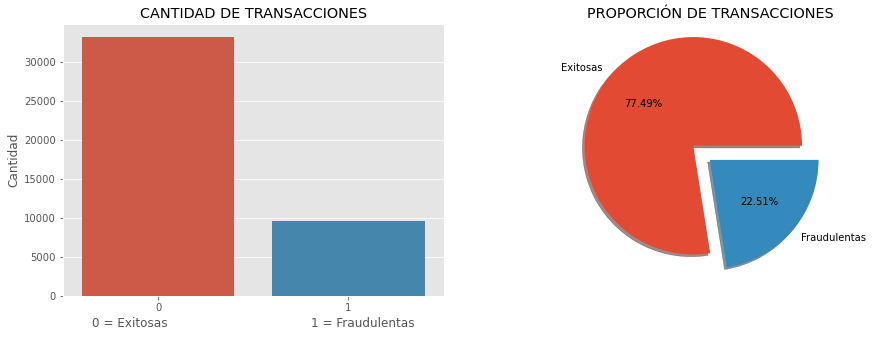

In [112]:
datos = new_Data['Fraude'].value_counts()
labels = np.array(['Exitosas', 'Fraudulentas'])
#figura y gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
circular = ax2.pie(datos.values, labels=labels, autopct='%1.2f%%', shadow=True, explode = [0.2, 0])
#barras = ax1.bar(labels, datos.values)
barras = sb.countplot(x = 'Fraude', data = new_Data, ax = ax1)
#Titulos
ax2.set(title="PROPORCIÓN DE TRANSACCIONES")
ax1.set(title="CANTIDAD DE TRANSACCIONES")
ax1.set(ylabel = 'Cantidad')
ax1.set(xlabel = f'0 = Exitosas {" "*35} 1 = Fraudulentas')
plt.show()

In [45]:
new_Data['Fraude'] = new_Data['Fraude'].astype('int64')
new_Data['Genero'] = new_Data['Genero'].astype('category').cat.codes
new_Data['Categoria comerciante'] = new_Data['Categoria comerciante'].astype('category').cat.codes
new_Data['Trabajo'] = new_Data['Trabajo'].astype('category').cat.codes

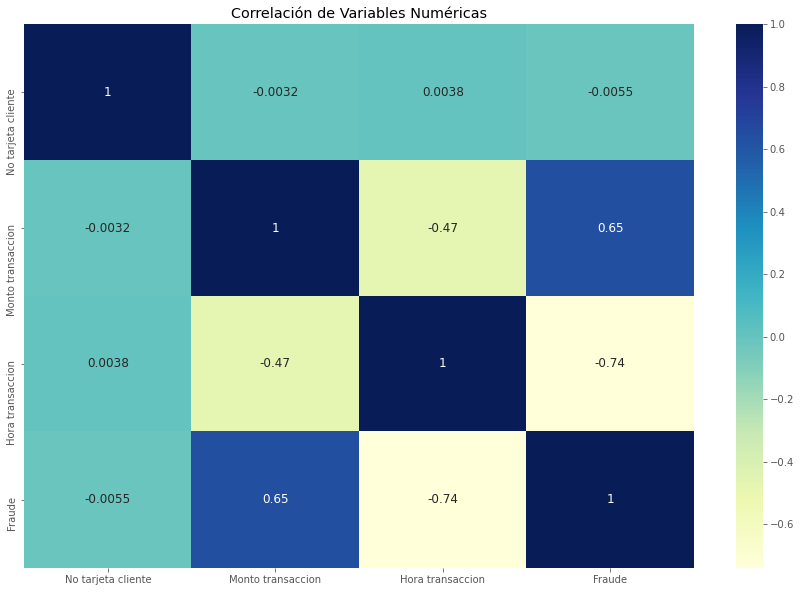

In [113]:
plt.figure(figsize=(15,10))
pc = new_Data.corr(method ='pearson')
ax = sb.heatmap(pc, annot=True, annot_kws={'size': 12}, cmap="YlGnBu")
plt.title('Correlación de Variables Numéricas')
plt.show()